In [5]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

# color codes
<font color='#5F2F08'>#5F2F08</font> - Seal brown
<font color='#173F66'>#173F66</font> - Indigo dye
<font color='#23732D'>#23732D</font> - Dark spring green
<font color='#982121'>#982121</font> - Carmine
<font color='#E66012'>#E66012</font> - Spanish orange
<font color='#F5C31E'>#F5C31E</font> - Saffron
<font color='#B789FA'>#B789FA</font> - Lavender (floral)
<font color='#F1BFA2'>#F1BFA2</font> - Apricot
<font color='#D9E6F2'>#D9E6F2</font> - Alice Blue
<font color='#D2B9F4'>#D2B9F4</font> - Mauve
<font color='#080502'>#080502</font> - Smokey black
<font color='#3A2C03'>#3A2C03</font> - Cafe noir
<font color='#46FD5F'>#46FD5F</font> - Erin

In [6]:
question_1_csv = Path("../Resources/energy_dataset_.csv")
df = pd.read_csv(question_1_csv)
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

In [8]:
energy = {1: "Solar", 2: 'Wind', 3: "Hydroelectric", 4: "Geothermal", 5: "Biomass", 6: "Tidal", 7: "Wave"}

colors = {"Solar": "#F5C31E", "Wind": "#E66012", "Hydroelectric": "#173F66", "Geothermal": "#982121", "Biomass": "#23732D", "Tidal": "#B789FA", "Wave": "#5F2F08"}

df["renewable_energy_source"] =  df.Type_of_Renewable_Energy.map(energy)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric


In [9]:
df_value = df.renewable_energy_source.value_counts().reset_index()
df_value

,renewable_energy_source,count
0,Wind,2202
1,Solar,2169
2,Hydroelectric,2157
3,Biomass,2150
4,Tidal,2124
5,Geothermal,2105
6,Wave,2093


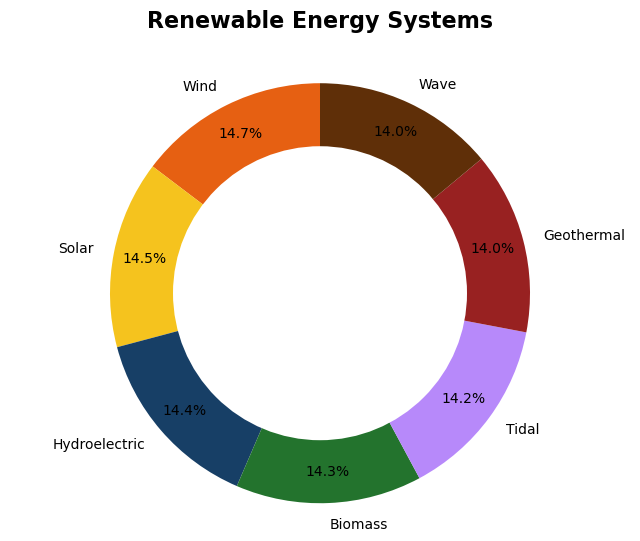

In [10]:
data = df_value["count"]
labels = df_value["renewable_energy_source"]
mapped_colors = [colors[label] for label in labels]

# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
plt.pie(data, labels=labels, colors=mapped_colors,
        autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.85)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# Step 4: Customizations
plt.title(f"Renewable Energy Systems\n", fontweight="bold", fontsize=16)
plt.axis("equal")

# Step 5: Save/Show
plt.show()

In [11]:
df.columns

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created',
       'renewable_energy_source'],
      dtype='object')

In [12]:
bar_df = df.groupby('renewable_energy_source')[['Energy_Production_MWh', 'Energy_Consumption_MWh']].mean().reset_index()
bar_df["Energy_Surplus_MWh"] = bar_df.Energy_Production_MWh - bar_df.Energy_Consumption_MWh

bar_df = bar_df.sort_values(by = "Energy_Surplus_MWh", ascending = True)

bar_df

,renewable_energy_source,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Surplus_MWh
6,Wind,250384.797558,228664.108937,21720.688621
5,Wave,252571.041821,228507.626678,24063.415143
3,Solar,252813.675988,228301.990566,24511.685422
4,Tidal,254210.857269,227249.932949,26960.924321
1,Geothermal,252893.832742,225350.324729,27543.508013
2,Hydroelectric,251070.361751,221711.577320,29358.784430
0,Biomass,252599.445246,222085.029309,30514.415938


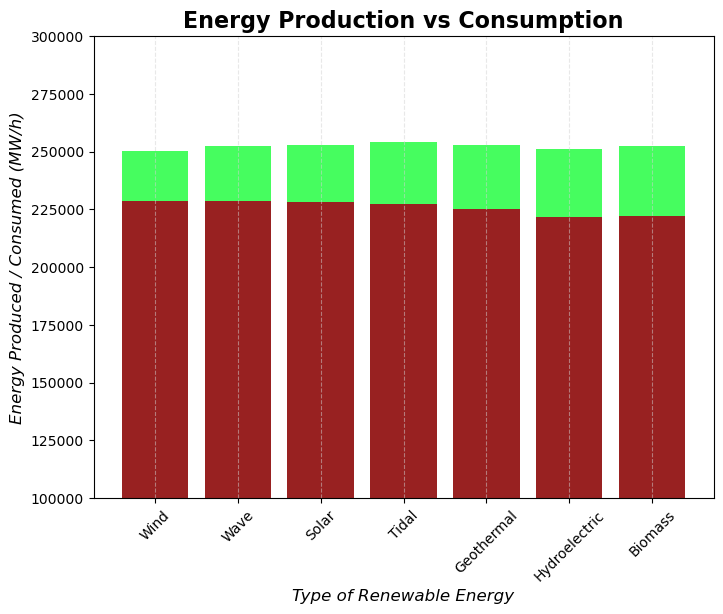

In [13]:
y = bar_df["Energy_Production_MWh"]
y2 = bar_df['Energy_Consumption_MWh']
x = bar_df["renewable_energy_source"]


# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.bar(x, y, color="#46FD5F", label='Energy Production')
plt.bar(x, y2, color= "#982121", label='Energy Consumption')

# Step 4: Customization
plt.xlabel("Type of Renewable Energy", fontsize=12, fontstyle="italic")
plt.ylabel("Energy Produced / Consumed (MW/h)", fontsize=12, fontstyle="italic")
plt.title("Energy Production vs Consumption", fontsize=16, fontweight="bold")
plt.ylim(100000, 300000)

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)

# Step 5: Show/Save
plt.show()

ValueError: Invalid RGBA argument: 'Solar'

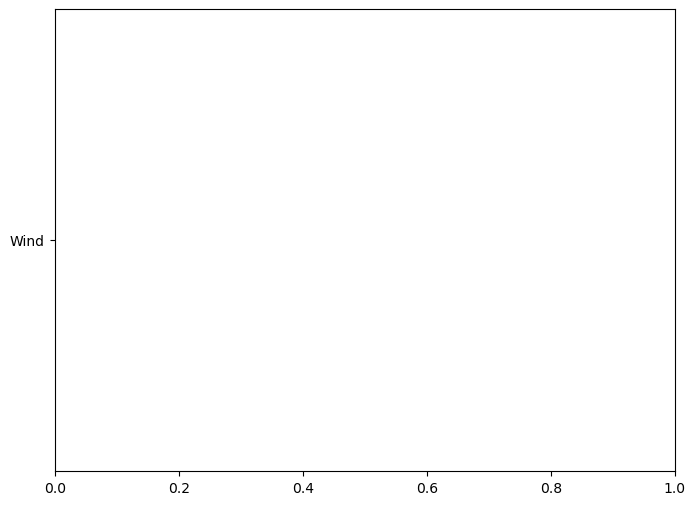

In [56]:
y = bar_df["Energy_Surplus_MWh"]
x = bar_df["renewable_energy_source"]

# b_colors = ['#E66012', '#5F2F08','#F5C31E', '#B789FA', '#982121', '#173F66', '#23732D']
# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color=colors[label])

# Step 4: Customization
plt.xlabel("Energy Surplus (MW/h)", fontsize=12, fontstyle="italic")
plt.ylabel("Type of Renewable Energy", fontsize=12, fontstyle="italic")
plt.title("Energy Surplus (MW/h) for Renewable Sources", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save
plt.show()

,renewable_energy_source,Energy_Production_MWh,Storage_Efficiency_Percentage
2,Hydroelectric,251070.361751,74.686478
1,Geothermal,252893.832742,74.888360
5,Wave,252571.041821,75.152016
0,Biomass,252599.445246,75.211634
3,Solar,252813.675988,75.329295
4,Tidal,254210.857269,75.437105
6,Wind,250384.797558,75.810829


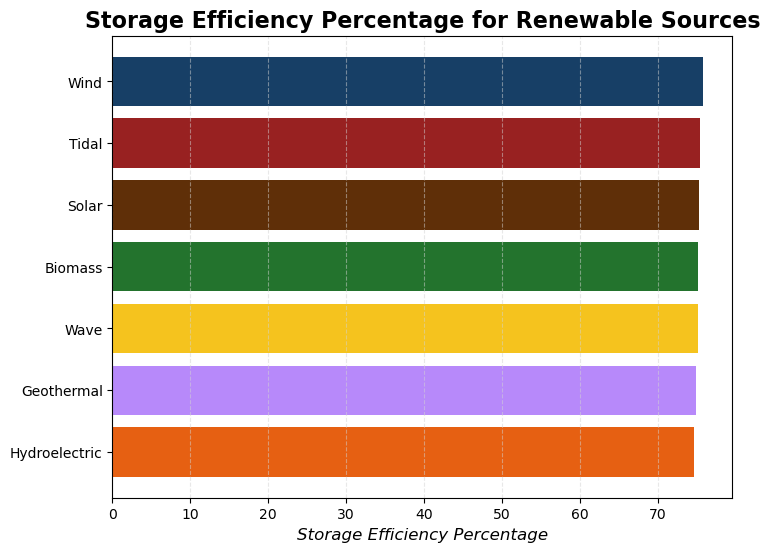

In [54]:
storage_bar_df = df.groupby('renewable_energy_source')[['Energy_Production_MWh', 'Storage_Efficiency_Percentage']].mean().reset_index()
# bar_df["Energy_Surplus_MWh"] = bar_df.Energy_Production_MWh - bar_df.Energy_Consumption_MWh

storage_bar_df = storage_bar_df.sort_values(by = "Storage_Efficiency_Percentage", ascending = True)

c_colors = ['#E66012', '#B789FA','#F5C31E', '#23732D', '#5F2F08', '#982121', '#173F66', ]

y = storage_bar_df["Storage_Efficiency_Percentage"]
x = storage_bar_df["renewable_energy_source"]

display(storage_bar_df)

# Step 2: Create the Canvas
plt.figure(figsize=(8,6))

# Step 3: Create the skeleton plot
plt.barh(x, y, color=c_colors)

# Step 4: Customization
plt.xlabel("Storage Efficiency Percentage", fontsize=12, fontstyle="italic")
plt.title("Type of Renewable Energy", fontsize=16, fontweight="bold")
plt.title("Storage Efficiency Percentage for Renewable Sources", fontsize=16, fontweight="bold")

plt.grid(axis="x", color="lightgrey", linestyle="--", alpha=0.5)

# Step 5: Show/Save
plt.show()

In [16]:
grid_integration = {1: 'Fully Integrated', 2: 'Partially Integrated', 3: 'Minimal Integration', 4: 'Isolated Microgrid'}

df["grid_integration_type"] =  df.Grid_Integration_Level.map(grid_integration)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal,Isolated Microgrid
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal,Isolated Microgrid
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar,Partially Integrated
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar,Minimal Integration
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric,Partially Integrated


In [17]:
funding_sources = {1: 'Government', 2: 'Private', 3: 'Public-Private Partnership'}

df["funding_label"] =  df.Funding_Sources.map(funding_sources)

df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type,funding_label
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal,Isolated Microgrid,Government
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal,Isolated Microgrid,Private
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar,Partially Integrated,Private
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar,Minimal Integration,Private
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric,Partially Integrated,Government


In [18]:
bar_df

,renewable_energy_source,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Surplus_MWh
6,Wind,250384.797558,228664.108937,21720.688621
5,Wave,252571.041821,228507.626678,24063.415143
3,Solar,252813.675988,228301.990566,24511.685422
4,Tidal,254210.857269,227249.932949,26960.924321
1,Geothermal,252893.832742,225350.324729,27543.508013
2,Hydroelectric,251070.361751,221711.577320,29358.784430
0,Biomass,252599.445246,222085.029309,30514.415938


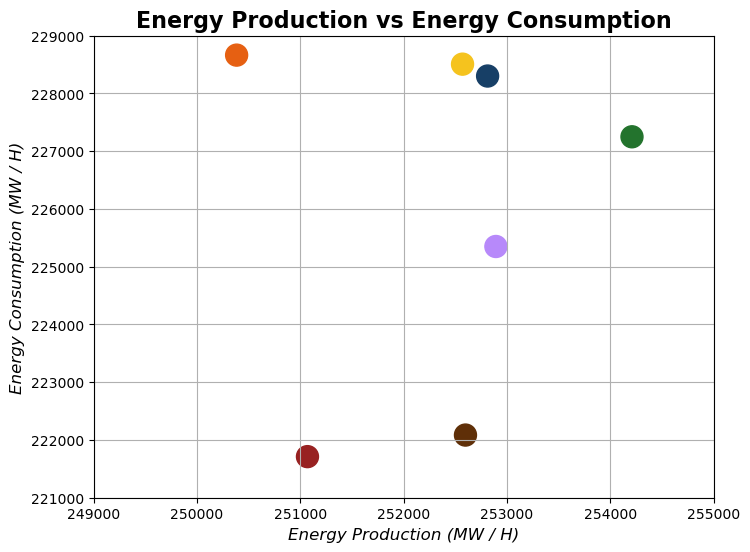

In [19]:
plt.figure(figsize=(8, 6))

x_values = bar_df['Energy_Production_MWh']
y_values = bar_df['Energy_Consumption_MWh']
s = bar_df.renewable_energy_source


sizes = 250


plt.scatter(x_values,y_values,c=mapped_colors, s=sizes)

plt.grid(True)
plt.xlim(249000, 255000)
plt.ylim(221000, 229000)
plt.xlabel('Energy Production (MW / H)', fontsize=12, fontstyle='italic')
plt.ylabel('Energy Consumption (MW / H)', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Energy Consumption", fontsize=16, fontweight="bold")
plt.show()

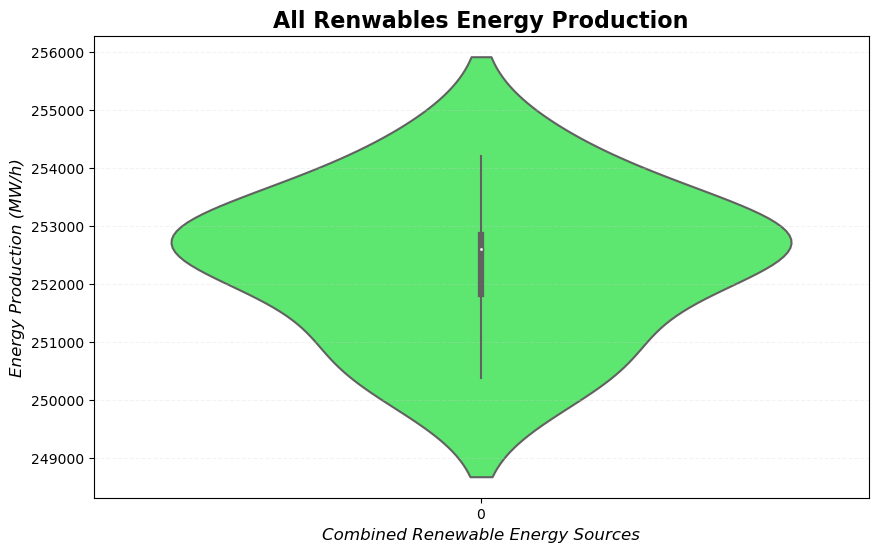

In [20]:
# Step 1: get the data
x = bar_df.Energy_Production_MWh

# create the plot
plt.figure(figsize=(10,6))
sns.violinplot(data=x, color="#46FD5F")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.title("All Renwables Energy Production", fontsize=16, fontweight="bold")
plt.xlabel("Combined Renewable Energy Sources", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
# show
plt.show()

Text(0.5, 1.0, 'Solar Energy Production')

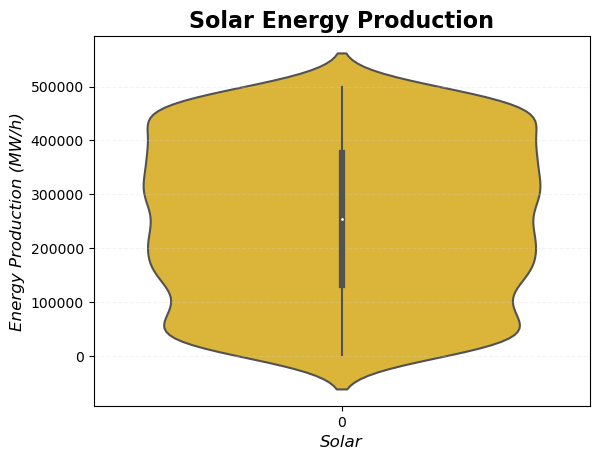

In [21]:
mask_et_1 = df['Type_of_Renewable_Energy'] == 1

et_1_df=df.loc[mask_et_1].reset_index(drop=True)

et_1_df.head()


sns.violinplot(data=et_1_df['Energy_Production_MWh'], color="#F5C31E")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Solar", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Solar Energy Production", fontsize=16, fontweight="bold")


Text(0.5, 1.0, 'Wind Energy Production')

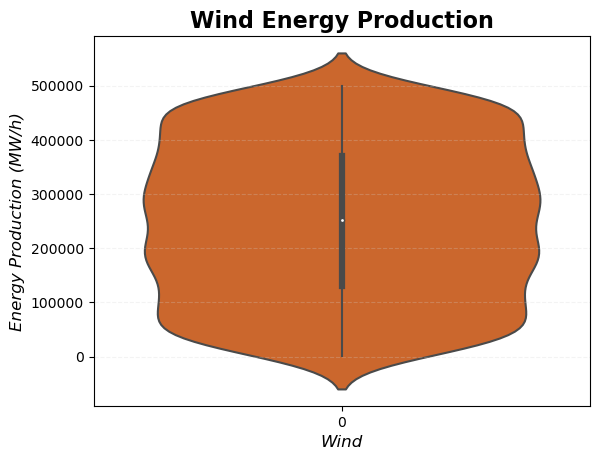

In [22]:
mask_et_2 = df['Type_of_Renewable_Energy'] == 2

et_2_df=df.loc[mask_et_2].reset_index(drop=True)

et_2_df.head()

# Use the violinplot function to create each violin plot within the same figure:

sns.violinplot(data=et_2_df['Energy_Production_MWh'], color="#E66012")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Wind", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Wind Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Hydroelectric Energy Production')

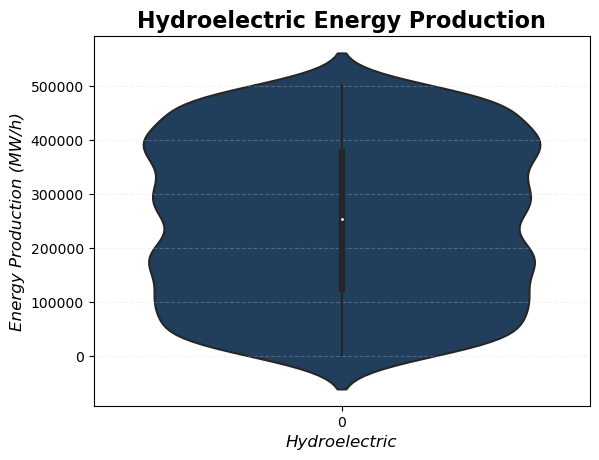

In [23]:
mask_et_3 = df['Type_of_Renewable_Energy'] == 3

et_3_df=df.loc[mask_et_3].reset_index(drop=True)

et_3_df.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=et_3_df['Energy_Production_MWh'], color="#173F66")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Hydroelectric", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Hydroelectric Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Geothermal Energy Production')

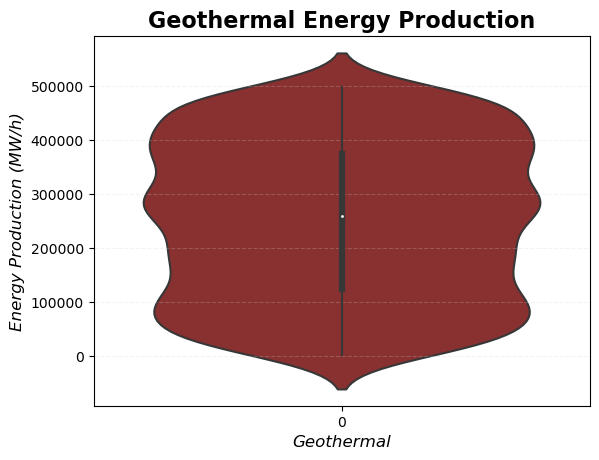

In [24]:
mask_et_4 = df['Type_of_Renewable_Energy'] == 4

et_4_df=df.loc[mask_et_4].reset_index(drop=True)

et_4_df.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=et_4_df['Energy_Production_MWh'], color="#982121")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Geothermal", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Geothermal Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Biomass Energy Production')

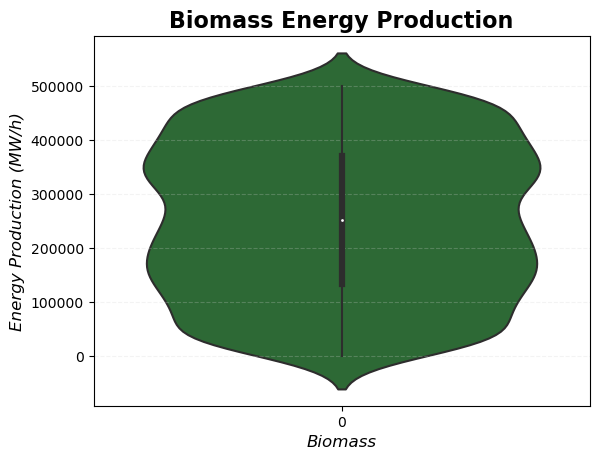

In [25]:
mask_et_5 = df['Type_of_Renewable_Energy'] == 5

et_5_df=df.loc[mask_et_5].reset_index(drop=True)

et_5_df.head()


# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=et_5_df['Energy_Production_MWh'], color="#23732D")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Biomass", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Biomass Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Tidal Energy Production')

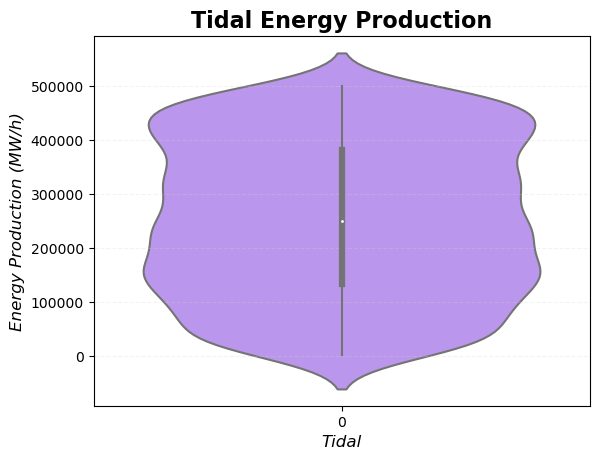

In [26]:
mask_et_6 = df['Type_of_Renewable_Energy'] == 6

et_6_df=df.loc[mask_et_6].reset_index(drop=True)

et_6_df.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=et_6_df['Energy_Production_MWh'], color="#B789FA")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Tidal", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Tidal Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Wave Energy Production')

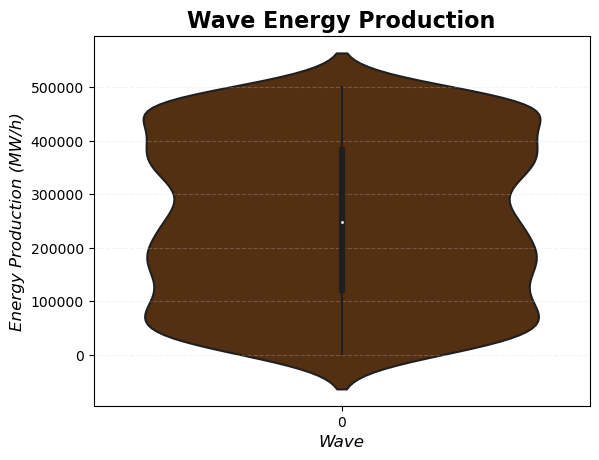

In [27]:
mask_et_7 = df['Type_of_Renewable_Energy'] == 7

et_7_df=df.loc[mask_et_7].reset_index(drop=True)

et_7_df.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=et_7_df['Energy_Production_MWh'], color="#5F2F08")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Wave", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Wave Energy Production", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production\nfrom Government Funding')

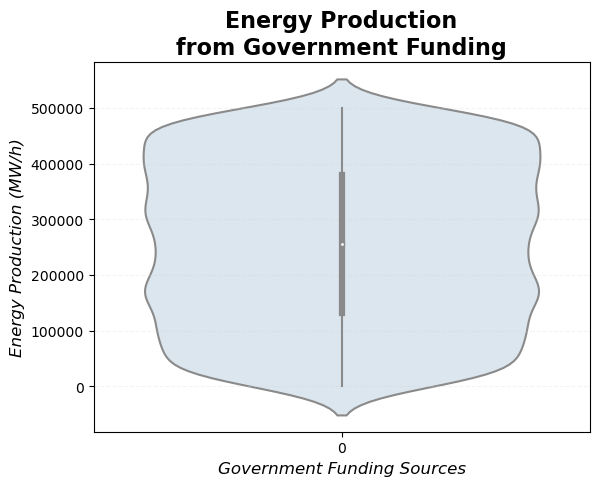

In [28]:
mask_gov = df['Funding_Sources'] == 1

df_gov=df.loc[mask_gov].reset_index(drop=True)

df_gov.head()

# Create a Matplotlib figure and axis:

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=df_gov['Energy_Production_MWh'], color="#D9E6F2")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Government Funding Sources", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Energy Production\nfrom Government Funding", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Financial Incentives\nBased on Government Funding')

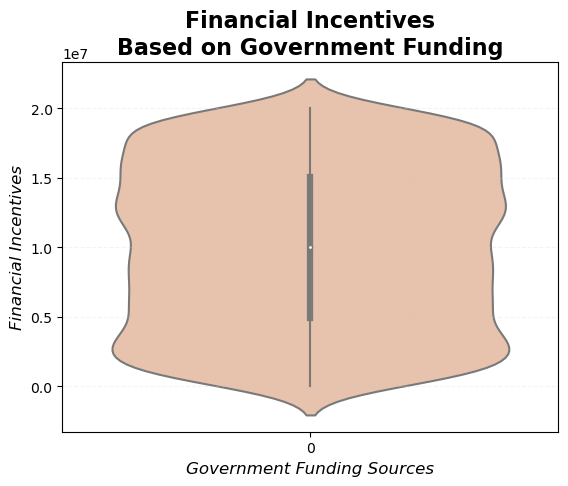

In [29]:
mask_gov = df['Funding_Sources'] == 1

df_gov_finances=df.loc[mask_gov].reset_index(drop=True)

df_gov_finances.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=df_gov_finances['Financial_Incentives_USD'], color="#F1BFA2")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Government Funding Sources", fontstyle="italic", fontsize=12)
plt.ylabel("Financial Incentives", fontstyle="italic", fontsize=12)
plt.title("Financial Incentives\nBased on Government Funding", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production\nBased on Grid Integration')

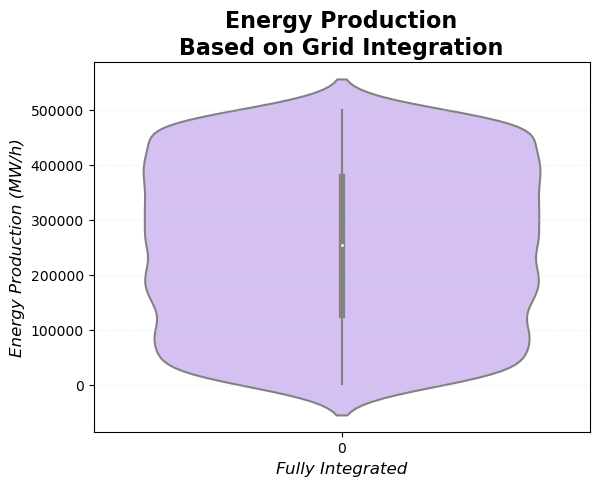

In [30]:
mask_grid = df['Grid_Integration_Level'] == 1

df_grid=df.loc[mask_grid].reset_index(drop=True)

df_grid.head()

# Use the violinplot function to create each violin plot within the same figure:
sns.violinplot(data=df_grid['Energy_Production_MWh'], color="#D2B9FA")

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)
plt.xlabel("Fully Integrated", fontstyle="italic", fontsize=12)
plt.ylabel("Energy Production (MW/h)", fontstyle="italic", fontsize=12)
plt.title("Energy Production\nBased on Grid Integration", fontsize=16, fontweight="bold")

In [31]:
sun_mask = df['Type_of_Renewable_Energy'] == 1

sun_df=df.loc[sun_mask].reset_index(drop=True)

Text(0.5, 1.0, 'Energy Production vs Air Pollution Reduction\nfor a Fully Integrated Grid (Solar)')

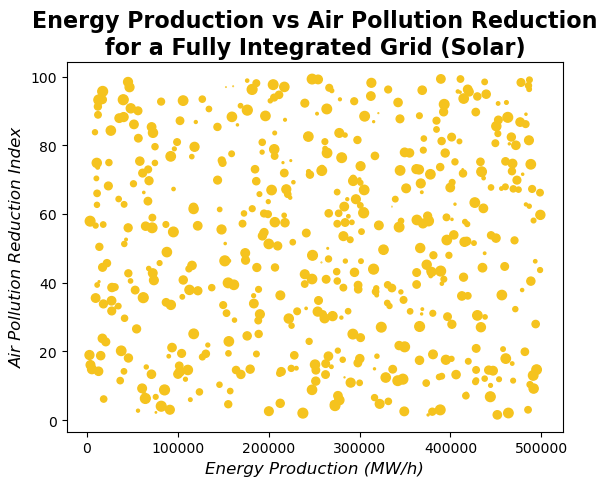

In [32]:
sun_full_mask = sun_df['Grid_Integration_Level'] == 1

sun_full_df=sun_df.loc[sun_full_mask].reset_index(drop=True)

x = sun_full_df['Energy_Production_MWh']
y = sun_full_df['Air_Pollution_Reduction_Index']
s = sun_full_df['Jobs_Created']
plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontstyle='italic', fontsize=12)
plt.ylabel('Air Pollution Reduction Index', fontstyle='italic', fontsize=12)
plt.title("Energy Production vs Air Pollution Reduction\nfor a Fully Integrated Grid (Solar)", fontsize=16, fontweight="bold")



# Bubble plot based Solar Energy for popularity
# Step 1: restrict our data, generate individual scatterplots for each level of grid integration
    # X - Air Pollution Reduction
    # Y - Storage_Efficiency_Percentage
    # Z - Jobs created

In [33]:
sun_full_df.count()

Type_of_Renewable_Energy         526
Installed_Capacity_MW            526
Energy_Production_MWh            526
Energy_Consumption_MWh           526
Energy_Storage_Capacity_MWh      526
Storage_Efficiency_Percentage    526
Grid_Integration_Level           526
Initial_Investment_USD           526
Funding_Sources                  526
Financial_Incentives_USD         526
GHG_Emission_Reduction_tCO2e     526
Air_Pollution_Reduction_Index    526
Jobs_Created                     526
renewable_energy_source          526
grid_integration_type            526
funding_label                    526
dtype: int64

Text(0.5, 1.0, 'Energy Production vs Air Pollution Reduction\nfor a Partially Integrated Grid (Solar)')

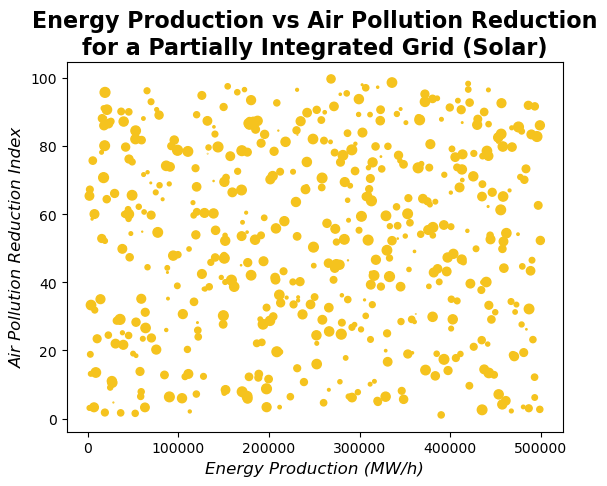

In [34]:
sun_partial_mask = sun_df['Grid_Integration_Level'] == 2



sun_partial_df=sun_df.loc[sun_partial_mask].reset_index(drop=True)

x = sun_partial_df['Energy_Production_MWh']
y = sun_partial_df['Air_Pollution_Reduction_Index']
s = sun_partial_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Air Pollution Reduction Index', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Air Pollution Reduction\nfor a Partially Integrated Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Air Pollution Reduction\nfor a Minimally Integrated Grid (Solar)')

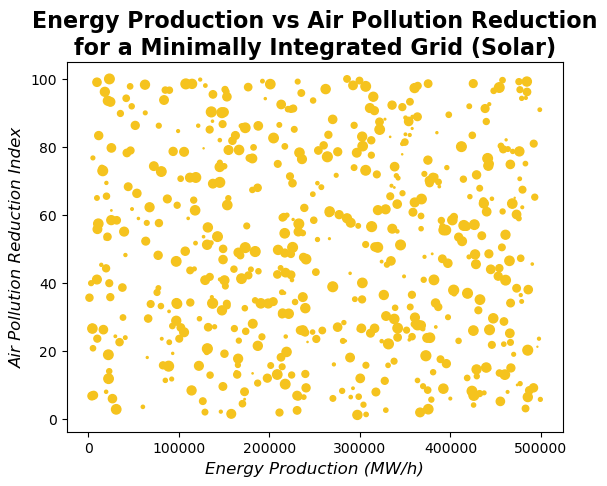

In [35]:
sun_min_mask = sun_df['Grid_Integration_Level'] == 3



sun_min_df=sun_df.loc[sun_min_mask].reset_index(drop=True)

x = sun_min_df['Energy_Production_MWh']
y = sun_min_df['Air_Pollution_Reduction_Index']
s = sun_min_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontstyle='italic', fontsize=12)
plt.ylabel('Air Pollution Reduction Index', fontstyle='italic', fontsize=12)
plt.title("Energy Production vs Air Pollution Reduction\nfor a Minimally Integrated Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Air Pollution Reduction\nfor a Micro Grid (Solar)')

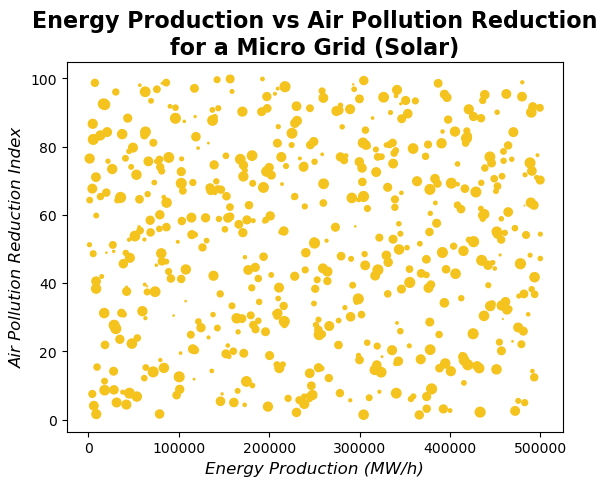

In [36]:
sun_micro_mask = sun_df['Grid_Integration_Level'] == 4



sun_micro_df=sun_df.loc[sun_micro_mask].reset_index(drop=True)

x = sun_micro_df['Energy_Production_MWh']
y = sun_micro_df['Air_Pollution_Reduction_Index']
s = sun_micro_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Air Pollution Reduction Index', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Air Pollution Reduction\nfor a Micro Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Greehouse Gas Reduction\nfor a Fully Integrated Grid (Solar)')

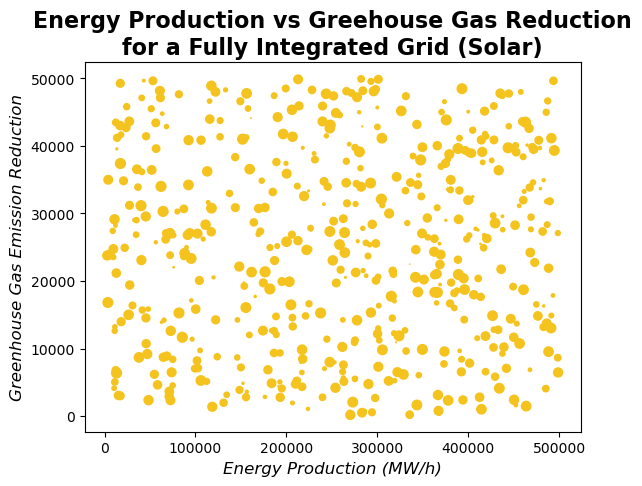

In [37]:
sun_full_mask_gh = sun_df['Grid_Integration_Level'] == 1



sun_full_gh_df=sun_df.loc[sun_full_mask_gh].reset_index(drop=True)

x = sun_full_gh_df['Energy_Production_MWh']
y = sun_full_gh_df['GHG_Emission_Reduction_tCO2e']
s = sun_full_gh_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Greehouse Gas Reduction\nfor a Fully Integrated Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Greehouse Gas Reduction\nfor a Partially Integrated Grid (Solar)')

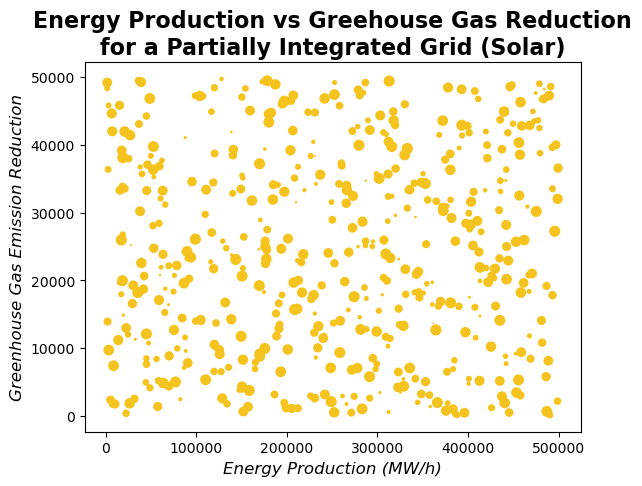

In [38]:
sun_partial_mask_gh = sun_df['Grid_Integration_Level'] == 2



sun_partial_gh_df=sun_df.loc[sun_partial_mask_gh].reset_index(drop=True)

x = sun_partial_gh_df['Energy_Production_MWh']
y = sun_partial_gh_df['GHG_Emission_Reduction_tCO2e']
s = sun_partial_gh_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Greehouse Gas Reduction\nfor a Partially Integrated Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Greehouse Gas Reduction\nfor a Minimally Integrated Grid (Solar)')

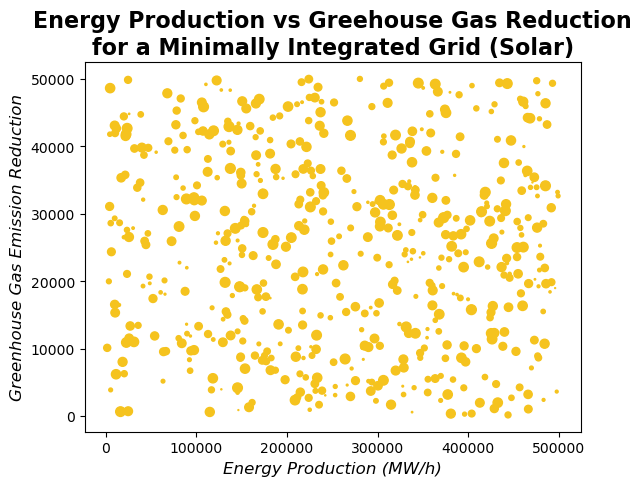

In [39]:
sun_min_mask_gh = sun_df['Grid_Integration_Level'] == 3



sun_min_gh_df=sun_df.loc[sun_min_mask_gh].reset_index(drop=True)

x = sun_min_gh_df['Energy_Production_MWh']
y = sun_min_gh_df['GHG_Emission_Reduction_tCO2e']
s = sun_min_gh_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Greehouse Gas Reduction\nfor a Minimally Integrated Grid (Solar)", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Energy Production vs Greehouse Gas Reduction\nfor a Minimally Integrated Grid (Solar)')

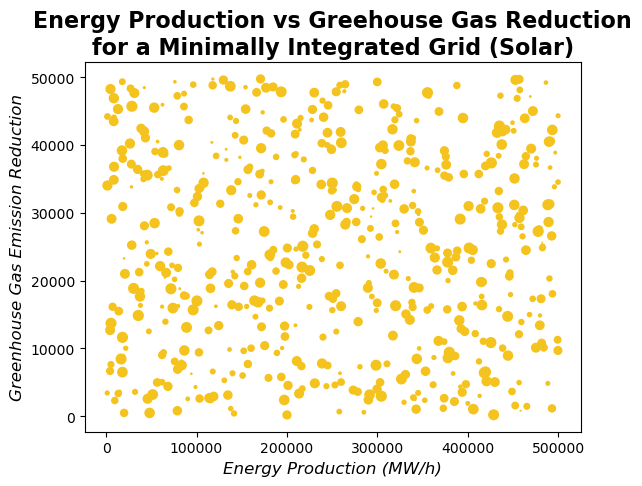

In [40]:
sun_micro_mask_gh = sun_df['Grid_Integration_Level'] == 4



sun_micro_gh_df=sun_df.loc[sun_micro_mask_gh].reset_index(drop=True)

x = sun_micro_gh_df['Energy_Production_MWh']
y = sun_micro_gh_df['GHG_Emission_Reduction_tCO2e']
s = sun_micro_gh_df['Jobs_Created']

plt.scatter(x, y , s=s*0.01, color = '#F5C31E')

plt.xlabel('Energy Production (MW/h)', fontsize=12, fontstyle='italic')
plt.ylabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.title("Energy Production vs Greehouse Gas Reduction\nfor a Minimally Integrated Grid (Solar)", fontsize=16, fontweight="bold")

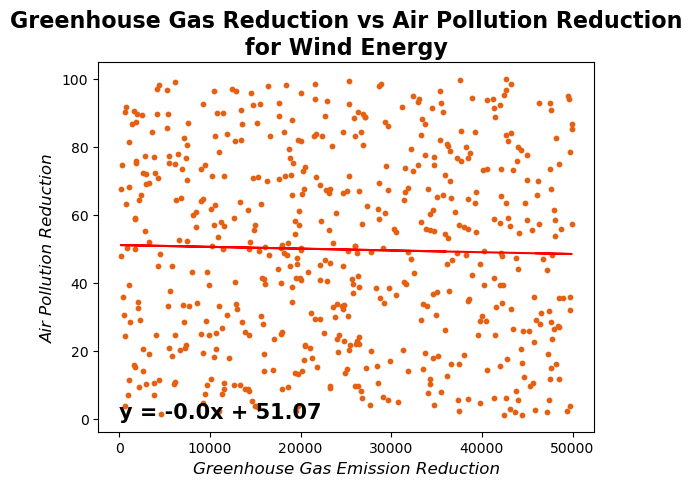

In [41]:
wind_full_mask = et_2_df.Grid_Integration_Level == 1
wind_full_df = et_2_df.loc[wind_full_mask].reset_index(drop=True)

x_values = wind_full_df['GHG_Emission_Reduction_tCO2e']
y_values = wind_full_df['Air_Pollution_Reduction_Index']

plt.scatter(x_values,y_values, s=10, color='#E66012')

plt.xlabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Air Pollution Reduction', fontsize=12, fontstyle='italic')
plt.title("Greenhouse Gas Reduction vs Air Pollution Reduction\nfor Wind Energy", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,weight='bold',color="black")
plt.show()

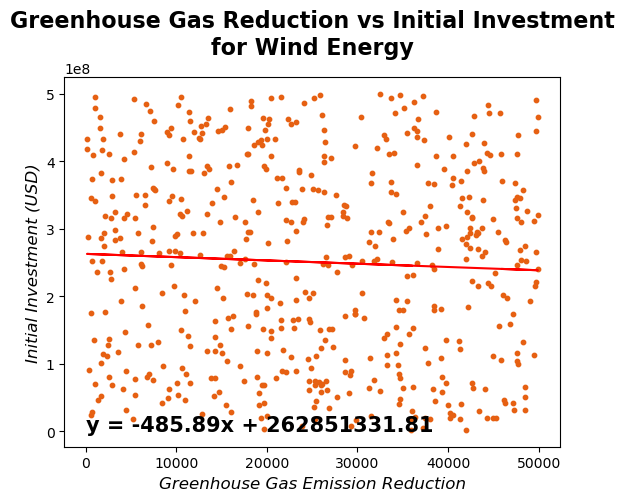

In [42]:
wind_full_mask = et_2_df.Grid_Integration_Level == 1
wind_full_df = et_2_df.loc[wind_full_mask].reset_index(drop=True)

x_values = wind_full_df['GHG_Emission_Reduction_tCO2e']
y_values = wind_full_df['Initial_Investment_USD']

plt.scatter(x_values,y_values, s=10, color="#E66012")
# , s=sizes
plt.xlabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Initial Investment (USD)', fontsize=12, fontstyle='italic')
plt.title("Greenhouse Gas Reduction vs Initial Investment\nfor Wind Energy", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,weight='bold',color="black")
plt.show()

In [43]:
wind_full_df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type,funding_label
0,2,70.727198,489002.78000,385899.04560,7465.763641,67.949657,1,3.065215e+07,2,1.881931e+07,35960.291280,71.813777,1584,Wind,Fully Integrated,Private
1,2,100.268332,253130.93560,126049.02190,8838.238542,99.318278,1,3.826418e+08,1,3.249708e+06,31575.113300,39.716037,728,Wind,Fully Integrated,Government
2,2,816.840903,172378.05330,76794.88451,8336.606067,56.438544,1,3.192048e+08,1,7.193882e+06,28433.008980,15.447292,3736,Wind,Fully Integrated,Government
3,2,387.674516,271103.26100,86831.71897,4458.610121,98.223985,1,5.338581e+07,3,1.290269e+07,5420.392103,33.069043,4817,Wind,Fully Integrated,Public-Private Partnership
4,2,926.012733,87004.86367,440448.83680,5467.566733,66.250138,1,3.254215e+08,2,3.805456e+06,34990.040060,37.269632,848,Wind,Fully Integrated,Private


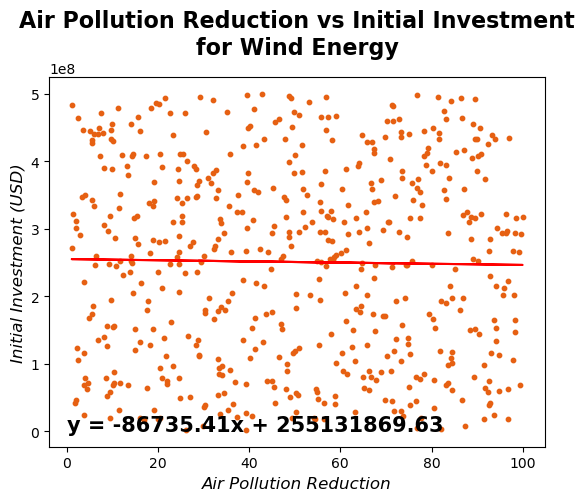

In [44]:
wind_full_mask = et_2_df.Grid_Integration_Level == 1
wind_full_df = et_2_df.loc[wind_full_mask].reset_index(drop=True)

x_values = wind_full_df['Air_Pollution_Reduction_Index']
y_values = wind_full_df['Initial_Investment_USD']

plt.scatter(x_values,y_values, s=10, color="#E66012")

plt.xlabel('Air Pollution Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Initial Investment (USD)', fontsize=12, fontstyle='italic')
plt.title("Air Pollution Reduction vs Initial Investment\nfor Wind Energy", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,weight='bold',color="black")
plt.show()


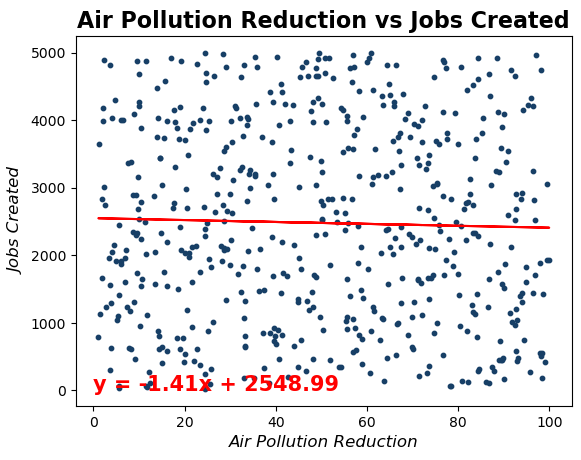

In [45]:
wind_full_mask = et_2_df.Grid_Integration_Level == 1
wind_full_df = et_2_df.loc[wind_full_mask].reset_index(drop=True)

x_values = wind_full_df['Air_Pollution_Reduction_Index']
y_values = wind_full_df['Jobs_Created']

plt.scatter(x_values,y_values, s=10, color="#173f66")

plt.xlabel('Air Pollution Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Jobs Created', fontsize=12, fontstyle='italic')
plt.title("Air Pollution Reduction vs Jobs Created", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,weight='bold',color="red")
plt.show()

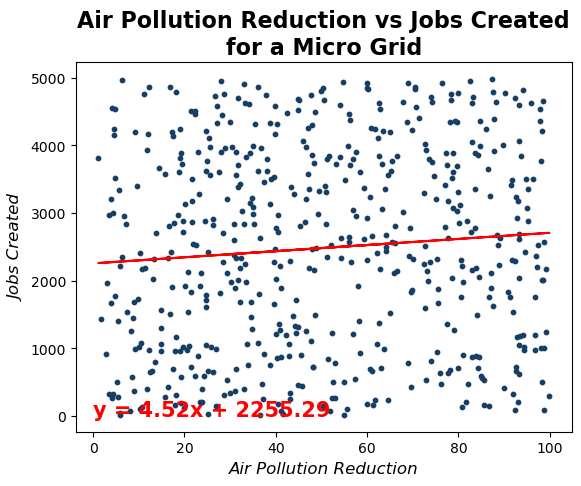

In [46]:
wind_micro_mask = et_2_df.Grid_Integration_Level == 4
wind_micro_df = et_2_df.loc[wind_micro_mask].reset_index(drop=True)

x_values = wind_micro_df['Air_Pollution_Reduction_Index']
y_values = wind_micro_df['Jobs_Created']

plt.scatter(x_values,y_values, s=10, color="#173f66")

plt.xlabel('Air Pollution Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Jobs Created', fontsize=12, fontstyle='italic')
plt.title("Air Pollution Reduction vs Jobs Created\nfor a Micro Grid", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,weight='bold',color="red")
plt.show()

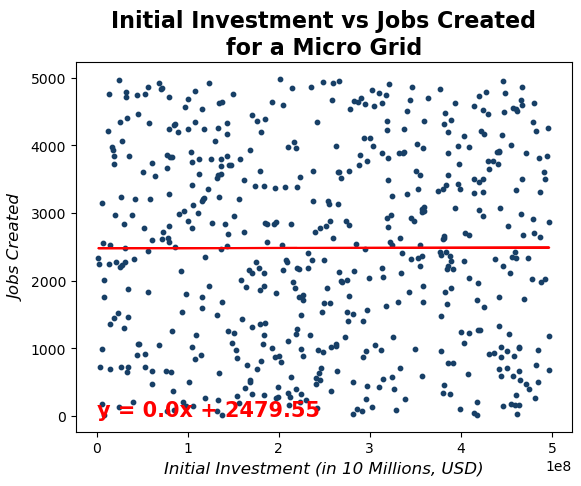

In [47]:
wind_micro_mask = et_2_df.Grid_Integration_Level == 4
wind_micro_df = et_2_df.loc[wind_micro_mask].reset_index(drop=True)

x_values = wind_micro_df['Initial_Investment_USD']
y_values = wind_micro_df['Jobs_Created']

plt.scatter(x_values,y_values, s=10, color="#173F66")

plt.xlabel('Initial Investment (in 10 Millions, USD)', fontsize=12, fontstyle='italic')
plt.ylabel('Jobs Created', fontsize=12, fontstyle='italic')
plt.title("Initial Investment vs Jobs Created\nfor a Micro Grid", fontsize=16, fontweight="bold")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15, weight='bold', color="red")
plt.show()

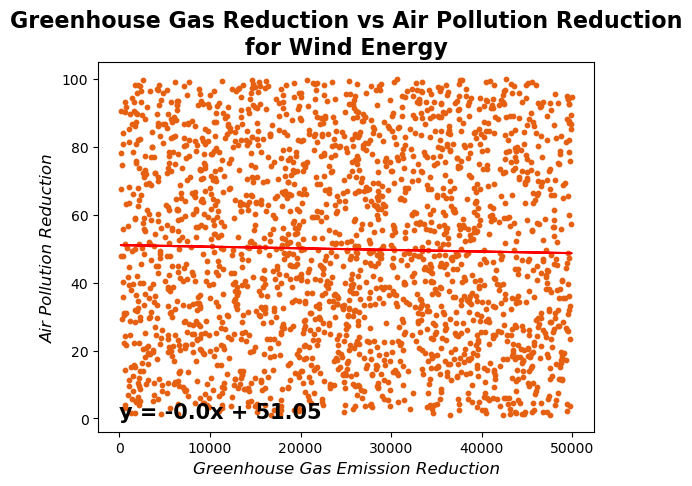

In [48]:
et_2_df.head()

x_values = et_2_df['GHG_Emission_Reduction_tCO2e']
y_values = et_2_df['Air_Pollution_Reduction_Index']

plt.scatter(x_values,y_values, s=10, c='#E66012')

plt.xlabel('Greenhouse Gas Emission Reduction', fontsize=12, fontstyle='italic')
plt.ylabel('Air Pollution Reduction', fontsize=12, fontstyle='italic')
plt.title("Greenhouse Gas Reduction vs Air Pollution Reduction\nfor Wind Energy", fontsize=16, fontweight="bold")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15, weight='bold',color="black")
plt.show()

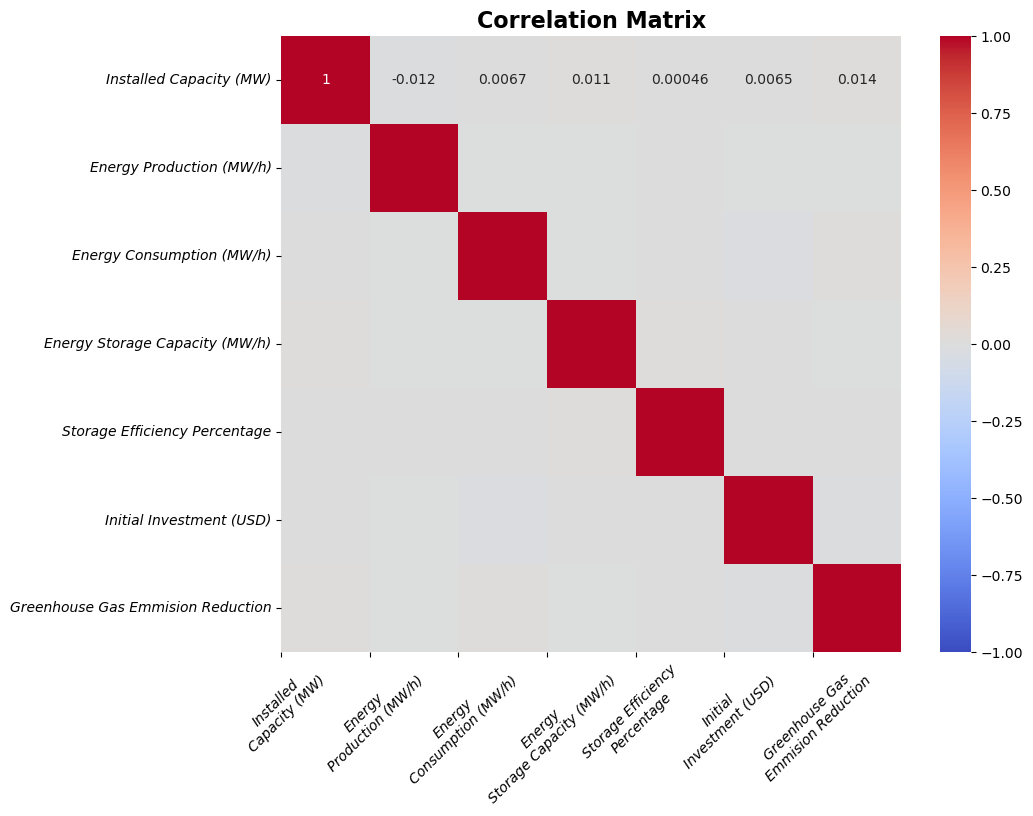

In [49]:
# Heatmap: Correlation matrix
correlation_matrix = df[['Installed_Capacity_MW', 'Energy_Production_MWh', 'Energy_Consumption_MWh',
                         'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
                         'Initial_Investment_USD', 'GHG_Emission_Reduction_tCO2e']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(ticks=np.arange(0, 7), labels=['Installed\nCapacity (MW)', 'Energy\nProduction (MW/h)', 'Energy\nConsumption (MW/h)', 'Energy\nStorage Capacity (MW/h)', 'Storage Efficiency\nPercentage', 'Initial\nInvestment (USD)', 'Greenhouse Gas\nEmmision Reduction'], fontstyle='italic', rotation=45)
plt.yticks(ticks=np.arange(0.5, 7.5), labels=['Installed Capacity (MW)', 'Energy Production (MW/h)', 'Energy Consumption (MW/h)', 'Energy Storage Capacity (MW/h)', 'Storage Efficiency Percentage', 'Initial Investment (USD)', 'Greenhouse Gas Emmision Reduction'], fontstyle='italic')

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

In [50]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created,renewable_energy_source,grid_integration_type,funding_label
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366,Geothermal,Isolated Microgrid,Government
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743,Geothermal,Isolated Microgrid,Private
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363,Solar,Partially Integrated,Private
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821,Solar,Minimal Integration,Private
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583,Hydroelectric,Partially Integrated,Government


In [51]:
jobs_created_by_type = df.groupby(by=["Type_of_Renewable_Energy"])["Jobs_Created"].mean()
jobs_created_by_type

Type_of_Renewable_Energy
1    2490.255417
2    2511.432334
3    2510.081595
4    2488.813302
5    2512.946977
6    2520.220339
7    2484.237458
Name: Jobs_Created, dtype: float64

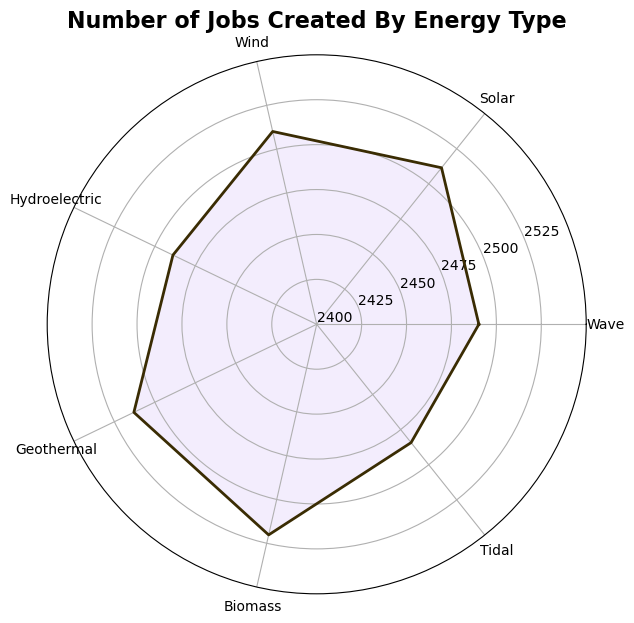

In [52]:
# For these two visuals, I used a combination Xpert, various searches to adjust code, and help from my tutor, Anna Poulakos
categories = energy.values()
values = list(jobs_created_by_type)

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='#D2B9FA', alpha=0.25)
ax.plot(angles, values, color='#3A2C03', linewidth=2)

min_value = min(values)
max_value = max(values)
num_ticks = 6
tick_spacing = (max_value - min_value)/ (num_ticks - 1)
y_ticks = np.arange(min_value, max_value + tick_spacing, tick_spacing)
ax.set_ylim(2450, 2550)

ax.set_yticks(np.arange(2400, 2550, step=25))
ax.set_xticks(angles[1:])
ax.set_xticklabels(categories)

plt.title("Number of Jobs Created By Energy Type", fontsize=16, fontweight="bold")
plt.show()

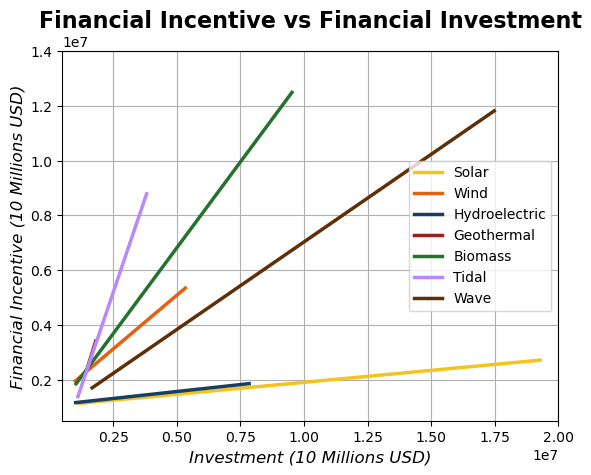

In [53]:
invest_by_type = df.groupby(by=["Type_of_Renewable_Energy"])['Initial_Investment_USD'].apply(list)
incentive_by_type = df.groupby(by=["Type_of_Renewable_Energy"])['Financial_Incentives_USD'].apply(list)

ii_by_type = pd.merge(invest_by_type, incentive_by_type, on=["Type_of_Renewable_Energy"])
ii_by_type

zipped_data = {}
import operator

for i,row in ii_by_type.iterrows():
    data = zip(row['Initial_Investment_USD'], row['Financial_Incentives_USD'])
    zipped_data[energy[i]] = sorted(data, key=operator.itemgetter(0))

for key, values in zipped_data.items():
    plt.plot(values[0], values[1], color=colors[key], label=key, linewidth=2.5)

plt.xlim(500000, 20000000)
plt.ylim(500000, 14000000)
plt.title('Financial Incentive vs Financial Investment', fontsize=16, fontweight='bold')
plt.xlabel('Investment (10 Millions USD)', fontsize=12, fontstyle='italic')
plt.ylabel('Financial Incentive (10 Millions USD)', fontsize=12, fontstyle='italic')
plt.legend()
plt.grid(True)
plt.show()